# Adrien HANS & Tanguy JEANNEAU
# TP1 - ensemble Learning

## Exercice 1 : Combinaison de classifieurs par vote majoritaire

### 1) 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier as VC
import seaborn as sns

### 2)

pour la classe DecisionTreeClassifier, limitez la profondeur de l’arbre à 5

In [2]:
#help(DecisionTreeClassifier)
DTC=DecisionTreeClassifier(max_depth=5)

pour la classe GaussianNB, choisissez tous les paramètres à leur valeur par défaut

In [3]:
GNB = GaussianNB()

pour la classe KNeighborsClassifier, choisissez le nombre de voisin(s) n_neighbors à 1

In [4]:
KNC=KNeighborsClassifier(n_neighbors=1)

### 3) 

In [5]:
(Y,c) = make_moons(n_samples=300,noise=0.3, random_state=11)

Affichez ce dataset à l’aide de la fonction scatter du module matplotlib.pyplot. 

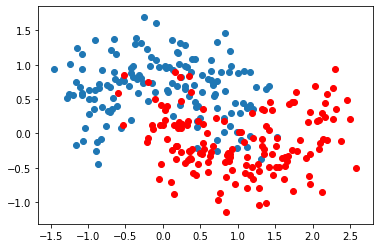

In [6]:
plt.scatter(Y[c==0][:,0], Y[c==0][:,1])
plt.scatter(Y[c==1][:,0], Y[c==1][:,1],color='r')
plt.show()

### 4)

In [7]:
"""
split_train_test(data,k=5)
splits data into 5 parts
"""

def split_train_test(Y, c,k=5):
    n=Y.shape[0]
    return (np.array([Y[int(i*n/k):int((i+1)*n/k)] for i in range(0,k)]), 
            np.array([c[int(i*n/k):int((i+1)*n/k)] for i in range(0,k)]))
Y_split, c_split = split_train_test(Y, c)

### 5)

In [8]:
def get_split_i(Y_split, c_split, i):
    nb_split, split_size, N = Y_split.shape

    Y_train = np.append(Y_split[0:i], Y_split[i:4], axis=0)
    Y_train = Y_train.reshape((nb_split-1)*split_size, N)
    Y_test = Y_split[i]
    
    c_train = np.append(c_split[0:i], c_split[i:4], axis=0)
    c_train = c_train.reshape((nb_split-1)*split_size)
    c_test = c_split[i]
    return Y_train, Y_test, c_train, c_test

In [9]:
Y_split, c_split = split_train_test(Y, c)
results = {'DTC': {'models': [], 'scores': []},
           'GNB': {'models': [], 'scores': []},
           'KNC': {'models': [], 'scores': []},
           'Fusion': {'models': [], 'scores' : []}}

for i in range(0,5):
    Y_train, Y_test, c_train, c_test = get_split_i(Y_split, c_split, i)
    
    #DecisionTreeClassifier
    DTC=DecisionTreeClassifier(max_depth=5)
    DTC.fit(Y_train, c_train)

    #GaussianNB
    GNB = GaussianNB()
    GNB.fit(Y_train, c_train)

    #KNeighborsClassifier
    KNC=KNeighborsClassifier(n_neighbors=1)
    KNC.fit(Y_train, c_train)

    #Fusion 
    Fusion=VC([('DTC', DTC),('GNB', GNB),('KNC',KNC)])
    Fusion.fit(Y_train, c_train)

    for name, model in [('DTC', DTC),('GNB', GNB),('KNC',KNC), ('Fusion', Fusion)]:
        results[name]['models'].append(model)
        results[name]['scores'].append(model.score(Y_test, c_test))

Affichage des resultats : 

In [10]:
def frontieres(clf, X=Y):
    h = .02
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[x11.ravel(), x22.ravel()])
    else:
        Z = clf.predict(np.c_[x11.ravel(), x22.ravel()])
    Z=Z.reshape(x11.shape)
    plt.contourf(x11, x22, Z, cmap=plt.cm.bwr, alpha=.8)

### 7) 

In [11]:
def plot_results(results, Y_split, c_split):
    fig = plt.figure(figsize=(15, 15))
    models = list(results.keys())
    N = len(models)
    M = len(results[models[0]]['scores'])
    
    for i in range(M):
        plt.subplot(M, N+1, (N+1)*i+1)
        plt.scatter(Y_split[i,:,0], Y_split[i,:,1], c=c_split[i])
        for j in range(N):
            plt.subplot(M, N+1, (N+1)*i+j+2)
            frontieres(results[models[j]]['models'][i])

    plt.show()

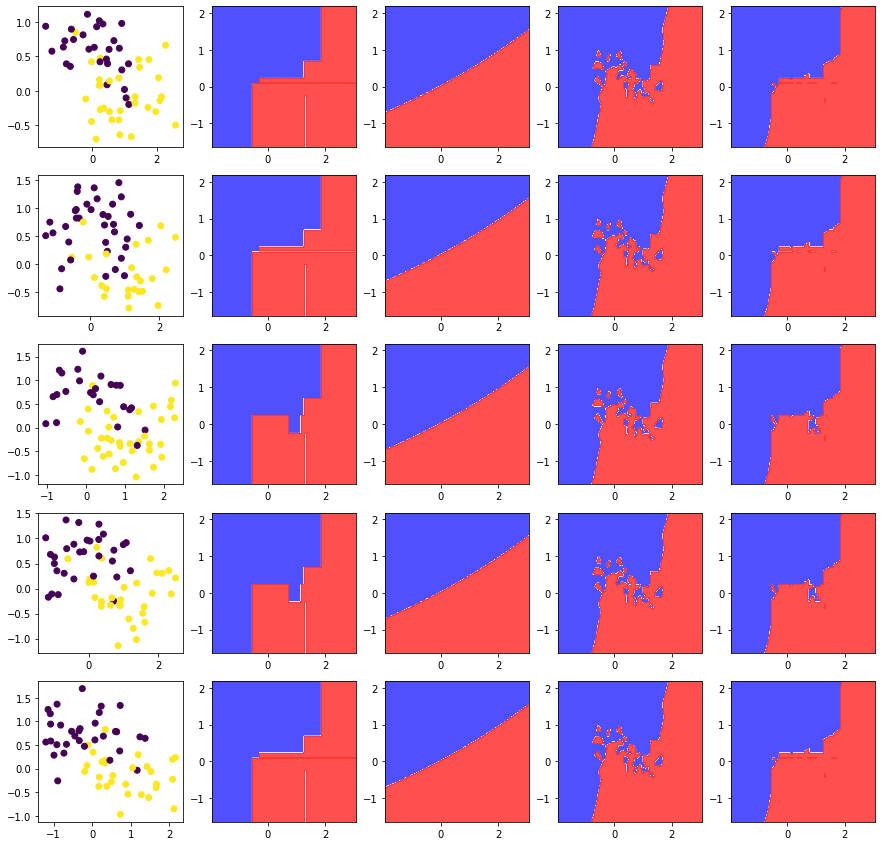

In [12]:
plot_results(results, Y_split, c_split)

### 8)

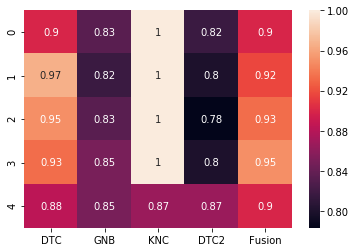

In [18]:
def plot_scores(results):
    scores_matrix = []
    models=list((results.keys()))
    for model in models:
        scores_matrix.append(results[model]['scores'])
    scores_matrix = np.array(scores_matrix).T
    sns.heatmap(scores_matrix, annot=True, xticklabels=models)
    plt.show()
    
plot_scores(results)

In [14]:
Y_split, c_split = split_train_test(Y, c)
results = {'DTC': {'models': [], 'scores': []},
           'GNB': {'models': [], 'scores': []},
           'KNC': {'models': [], 'scores': []},
           'DTC2': {"models": [], "scores": []},
           'Fusion': {'models': [], 'scores' : []}}

for i in range(0,5):
    Y_train, Y_test, c_train, c_test = get_split_i(Y_split, c_split, i)
    
    Y_train_split, c_train_split = split_train_test(Y_train, c_train)
    for j in range(0,5):
        Y_train_small, Y_val, c_train_small, c_val = get_split_i(Y_train_split, c_train_split, j)

        #DecisionTreeClassifier
        DTC = DecisionTreeClassifier(max_depth=5)
        DTC.fit(Y_train, c_train)

        #GaussianNB
        GNB = GaussianNB()
        GNB.fit(Y_train, c_train)

        #KNeighborsClassifier
        KNC = KNeighborsClassifier(n_neighbors=1)
        KNC.fit(Y_train, c_train)

        #DecisionTreeClassifier
        DTC2 = DecisionTreeClassifier(max_depth=1)
        DTC2.fit(Y_train, c_train)

        #Fusion 
        Fusion = VC([('DTC', DTC),('GNB', GNB),('KNC',KNC), ('DTC2', DTC2)])
        Fusion.fit(Y_train, c_train)

        for name, model in [('DTC', DTC), ('GNB', GNB), ('KNC',KNC), ('DTC2', DTC2), ('Fusion', Fusion)]:
            results[name]['models'].append(model)
            results[name]['scores'].append(model.score(Y_test, c_test))

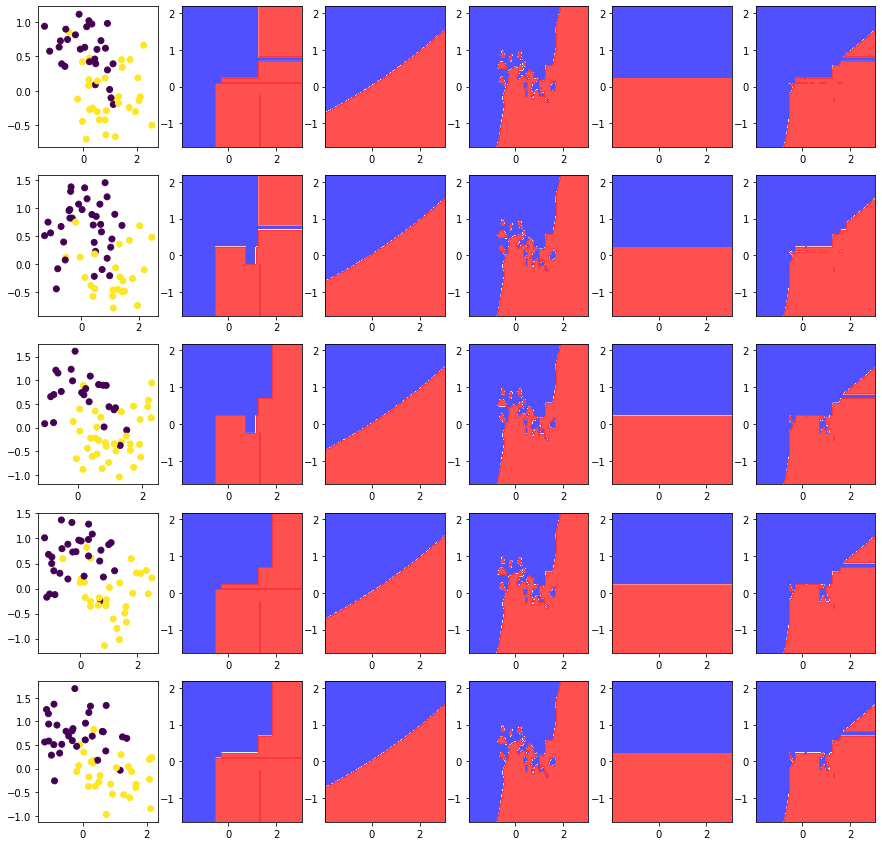

In [15]:
plot_results(results, Y_split, c_split)

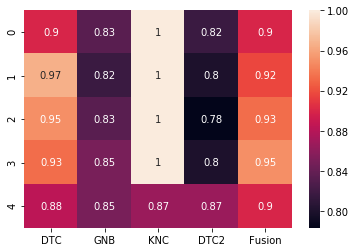

In [19]:
plot_scores(results)